In [46]:
# All Library imports goes here

import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sb
import numpy as np

In [47]:
plt.style.use("bmh")    # 'bmh' plot style used for clarity and pleasantness

In [48]:
# These two values are used to demonstrate the bad effect of not pre-processing.

# GMT_TO_HONOLULU_CONVERSION = 0
GMT_TO_HONOLULU_CONVERSION = -10 * 3600 # to change time zone from GMT to Pacific/Honolulu

In [49]:
raw_data = pd.read_csv("data/SolarPrediction.csv")
data = raw_data.sort_values("UNIXTime")    # pre-processing

In [50]:
unix_time = data["UNIXTime"]
date = data["Date"]
time = data["Time"]
temperature = data["Temperature"]
pressure = data["Pressure"]
humidity = data["Humidity"]
wind_direction = data["WindDirection(Degrees)"]
speed = data["Speed"]
time_sunrise = data["TimeSunRise"]
time_sunset = data["TimeSunSet"]
speed = data["Speed"]
radiation = data["Radiation"]

In [51]:
pearson_corr = data.corr("pearson")
kendall_corr = data.corr("kendall")
spearman_corr = data.corr("spearman")

In [52]:
pearson_corr

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


In [53]:
kendall_corr

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.107129,-0.268678,-0.160785,-0.033164,0.098021,0.104670
Radiation,-0.107129,1.000000,0.538313,0.031905,-0.084600,-0.205663,-0.015171
Temperature,-0.268678,0.538313,1.000000,0.199718,-0.151589,-0.269547,-0.052562
Pressure,-0.160785,0.031905,0.199718,1.000000,-0.150526,-0.105480,0.021822
Humidity,-0.033164,-0.084600,-0.151589,-0.150526,1.000000,-0.041277,-0.156442
WindDirection(Degrees),0.098021,-0.205663,-0.269547,-0.105480,-0.041277,1.000000,0.060362
Speed,0.104670,-0.015171,-0.052562,0.021822,-0.156442,0.060362,1.000000


In [54]:
spearman_corr

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.153584,-0.387204,-0.227867,-0.046249,0.145369,0.147221
Radiation,-0.153584,1.000000,0.717746,0.045577,-0.117571,-0.314843,-0.021066
Temperature,-0.387204,0.717746,1.000000,0.279273,-0.212946,-0.375322,-0.074065
Pressure,-0.227867,0.045577,0.279273,1.000000,-0.216916,-0.155669,0.029907
Humidity,-0.046249,-0.117571,-0.212946,-0.216916,1.000000,-0.062702,-0.218425
WindDirection(Degrees),0.145369,-0.314843,-0.375322,-0.155669,-0.062702,1.000000,0.086524
Speed,0.147221,-0.021066,-0.074065,0.029907,-0.218425,0.086524,1.000000


In [55]:
utc_date = unix_time.apply(lambda x: datetime.utcfromtimestamp(int(x) - GMT_TO_HONOLULU_CONVERSION).strftime('%Y-%m-%d'))    # pre-processing

In [56]:
# to get the distinct dates

dates = []
for index, row in data.iterrows():
    day = datetime.utcfromtimestamp(int(row["UNIXTime"]) - GMT_TO_HONOLULU_CONVERSION).strftime('%Y-%m-%d')
    if not day in dates:
        dates.append(day)
print(dates)

['2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17', '2016-09-18', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24', '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10', '2016

In [73]:
# to accumulate the solar radiation values for each distinct date

daily_radiation = {}
for date in dates:
    daily_radiation[date] = list()
print(daily_radiation)

{'2016-09-01': [], '2016-09-02': [], '2016-09-03': [], '2016-09-04': [], '2016-09-05': [], '2016-09-06': [], '2016-09-07': [], '2016-09-08': [], '2016-09-09': [], '2016-09-10': [], '2016-09-11': [], '2016-09-12': [], '2016-09-13': [], '2016-09-14': [], '2016-09-15': [], '2016-09-16': [], '2016-09-17': [], '2016-09-18': [], '2016-09-19': [], '2016-09-20': [], '2016-09-21': [], '2016-09-22': [], '2016-09-23': [], '2016-09-24': [], '2016-09-25': [], '2016-09-26': [], '2016-09-27': [], '2016-09-28': [], '2016-09-29': [], '2016-09-30': [], '2016-10-01': [], '2016-10-02': [], '2016-10-03': [], '2016-10-04': [], '2016-10-05': [], '2016-10-06': [], '2016-10-07': [], '2016-10-08': [], '2016-10-09': [], '2016-10-10': [], '2016-10-11': [], '2016-10-12': [], '2016-10-13': [], '2016-10-14': [], '2016-10-15': [], '2016-10-16': [], '2016-10-17': [], '2016-10-18': [], '2016-10-19': [], '2016-10-20': [], '2016-10-21': [], '2016-10-22': [], '2016-10-23': [], '2016-10-24': [], '2016-10-25': [], '2016-10-

In [58]:
# to accumulate the solar radiation values for each distinct date

for index, row in data.iterrows():
    day = datetime.utcfromtimestamp(int(row["UNIXTime"] - GMT_TO_HONOLULU_CONVERSION)).strftime('%Y-%m-%d')
    daily_radiation[day].append(row["Radiation"])
print(daily_radiation)

{'2016-09-01': [2.58, 2.83, 2.16, 2.21, 2.25, 2.15, 2.07, 2.06, 2.1, 2.07, 2.1, 2.4, 2.06, 3.55, 3.63, 3.76, 3.25, 3.9, 3.13, 3.37, 3.51, 2.84, 3.26, 2.57, 2.58, 3.24, 2.87, 2.52, 2.74, 2.3, 2.25, 2.12, 1.94, 2.03, 2.26, 2.27, 2.63, 2.93, 2.59, 2.83, 2.17, 2.12, 2.02], '2016-09-02': [1.69, 2.03, 3.35, 2.34, 2.2, 2.63, 3.2, 2.85, 2.38, 2.67, 3.22, 2.73, 1.61, 1.85, 1.71, 1.76, 1.73, 1.71, 1.71, 2.02, 1.87, 1.72, 4.43, 8.3, 9.09, 11.28, 13.64, 18.71, 27.94, 43.99, 53.19, 43.18, 51.8, 63.75, 62.49, 87.65, 92.24, 155.07, 242.53, 146.12, 183.46, 406.11, 449.0, 555.78, 587.37, 386.25, 633.24, 234.56, 462.71, 786.81, 708.67, 398.94, 793.15, 838.66, 724.35, 831.38, 725.35, 794.6, 899.06, 928.27, 999.94, 916.47, 986.69, 486.31, 1073.71, 1027.63, 1006.1, 1012.53, 1008.46, 1013.32, 1009.88, 978.36, 952.03, 974.1, 1005.43, 1000.96, 1063.06, 1061.27, 1065.3, 1070.12, 1067.15, 1072.24, 1072.94, 1073.43, 1069.16, 1059.15, 1051.8, 1058.61, 1048.67, 1039.12, 1019.48, 1018.59, 998.96, 1004.49, 989.02, 9

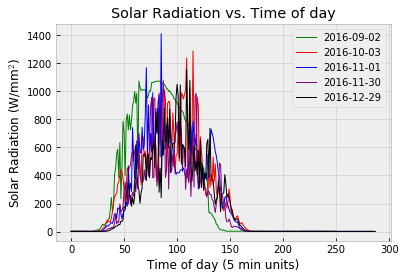

In [60]:
# to plot the solar radiation for 5 selected days which are nearly 30 days apart 
# (demonstrate both un-pre-processed and pre-processed plots)

fig1, ax1 = plt.subplots()
# time_units_1 = np.arange(len(daily_radiation[dates[0]]))
# time_units_2 = np.arange(len(daily_radiation[dates[30]]))
# time_units_3 = np.arange(len(daily_radiation[dates[61]]))
# time_units_4 = np.arange(len(daily_radiation[dates[91]]))
# time_units_5 = np.arange(len(daily_radiation[dates[121]]))
# ax1.plot(time_units_1, daily_radiation[dates[0]], label=dates[0], color="green", linewidth="1", linestyle="solid")
# ax1.plot(time_units_2, daily_radiation[dates[30]], label=dates[30], color="red", linewidth="1", linestyle="solid")
# ax1.plot(time_units_3, daily_radiation[dates[61]], label=dates[61], color="blue", linewidth="1", linestyle="solid")
# ax1.plot(time_units_4, daily_radiation[dates[91]], label=dates[91], color="purple", linewidth="1", linestyle="solid")
# ax1.plot(time_units_5, daily_radiation[dates[121]], label=dates[121], color="black", linewidth="1", linestyle="solid")
time_units_1 = np.arange(len(daily_radiation[dates[1]]))
time_units_2 = np.arange(len(daily_radiation[dates[32]]))
time_units_3 = np.arange(len(daily_radiation[dates[61]]))
time_units_4 = np.arange(len(daily_radiation[dates[90]]))
time_units_5 = np.arange(len(daily_radiation[dates[117]]))
ax1.plot(time_units_1, daily_radiation[dates[1]], label=dates[1], color="green", linewidth="1", linestyle="solid")
ax1.plot(time_units_2, daily_radiation[dates[32]], label=dates[32], color="red", linewidth="1", linestyle="solid")
ax1.plot(time_units_3, daily_radiation[dates[61]], label=dates[61], color="blue", linewidth="1", linestyle="solid")
ax1.plot(time_units_4, daily_radiation[dates[90]], label=dates[90], color="purple", linewidth="1", linestyle="solid")
ax1.plot(time_units_5, daily_radiation[dates[117]], label=dates[117], color="black", linewidth="1", linestyle="solid")
ax1.set_xlabel("Time of day (5 min units)")
ax1.set_ylabel("Solar Radiation (W/mm$^2$)")
ax1.set_title("Solar Radiation vs. Time of day")
ax1.legend()

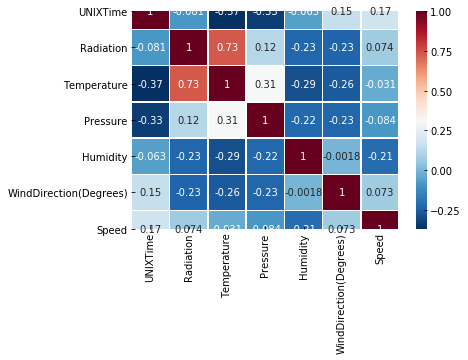

In [75]:
# pearson correlation coefficient heatmap

sb.heatmap(pearson_corr,
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Text(0.5, 1.0, 'Solar Radiation vs. Temperature')

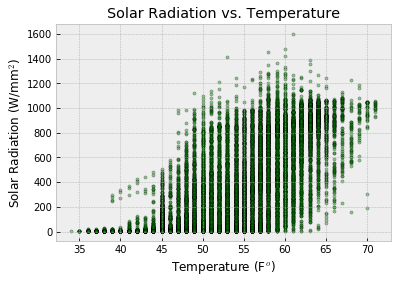

In [67]:
fig2, ax2 = plt.subplots()
ax2.scatter(temperature, radiation, s=10, c="green", edgecolor="black", linewidth=0.5, alpha=0.4)
ax2.set_xlabel("Temperature (F$^o$)")
ax2.set_ylabel("Solar Radiation (W/mm$^2$)")
ax2.set_title("Solar Radiation vs. Temperature")

Text(0.5, 1.0, 'Solar Radiation vs. Pressure')

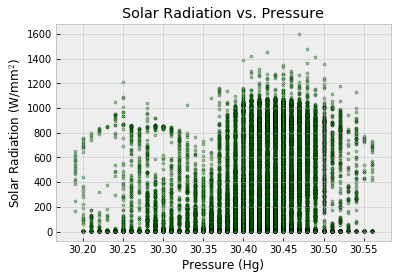

In [68]:
fig3, ax3 = plt.subplots()
ax3.scatter(pressure, radiation, s=10, c="green", edgecolor="black", linewidth=0.5, alpha=0.4)
ax3.set_xlabel("Pressure (Hg)")
ax3.set_ylabel("Solar Radiation (W/mm$^2$)")
ax3.set_title("Solar Radiation vs. Pressure")

Text(0.5, 1.0, 'Solar Radiation vs. Humidity')

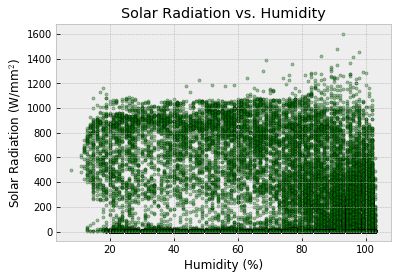

In [69]:
fig4, ax4 = plt.subplots()
ax4.scatter(humidity, radiation, s=10, c="green", edgecolor="black", linewidth=0.5, alpha=0.4)
ax4.set_xlabel("Humidity (%)")
ax4.set_ylabel("Solar Radiation (W/mm$^2$)")
ax4.set_title("Solar Radiation vs. Humidity")

Text(0.5, 1.0, 'Solar Radiation vs. Wind Direction')

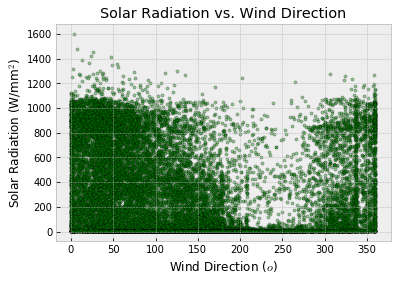

In [70]:
fig5, ax5 = plt.subplots()
ax5.scatter(wind_direction, radiation, s=10, c="green", edgecolor="black", linewidth=0.5, alpha=0.4)
ax5.set_xlabel("Wind Direction ($o$)")
ax5.set_ylabel("Solar Radiation (W/mm$^2$)")
ax5.set_title("Solar Radiation vs. Wind Direction")